In [38]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist

from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

In [39]:
imagem = cv2.imread("imagens/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

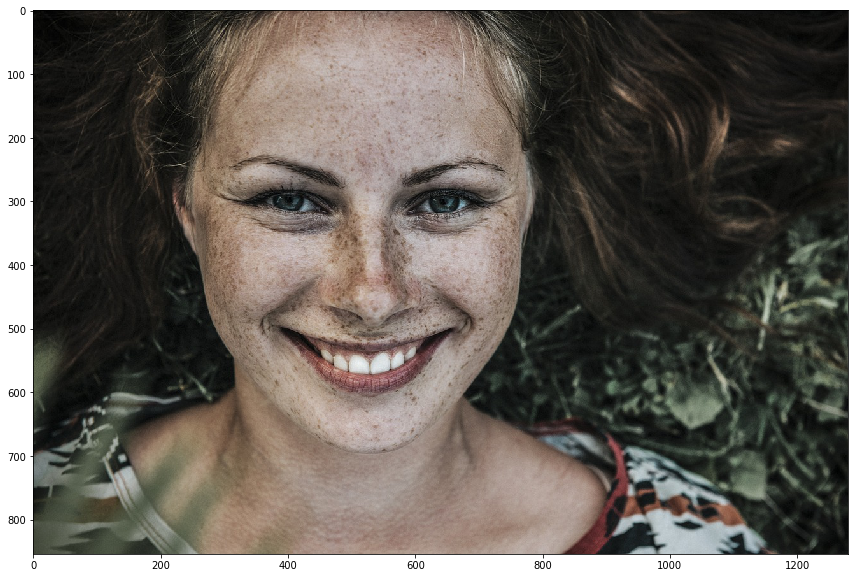

In [40]:
plt.figure(figsize=(20,10))
plt.imshow(imagem)

In [41]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

In [42]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagem

In [43]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


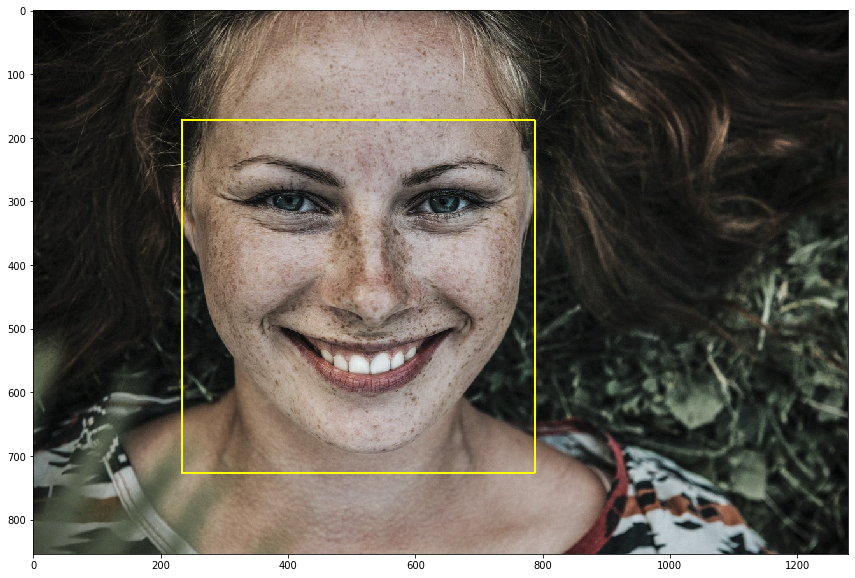

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [45]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    marcos = []
    
    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem,ret).parts()]))
    
    return marcos

In [46]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [47]:
len(marcos_faciais)

1

In [48]:
len(marcos_faciais[0])

68

In [49]:
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0,0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255,255,0), -1)
            #cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8,
            #           (255,255,255), 2)
    
    return imagem

In [50]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

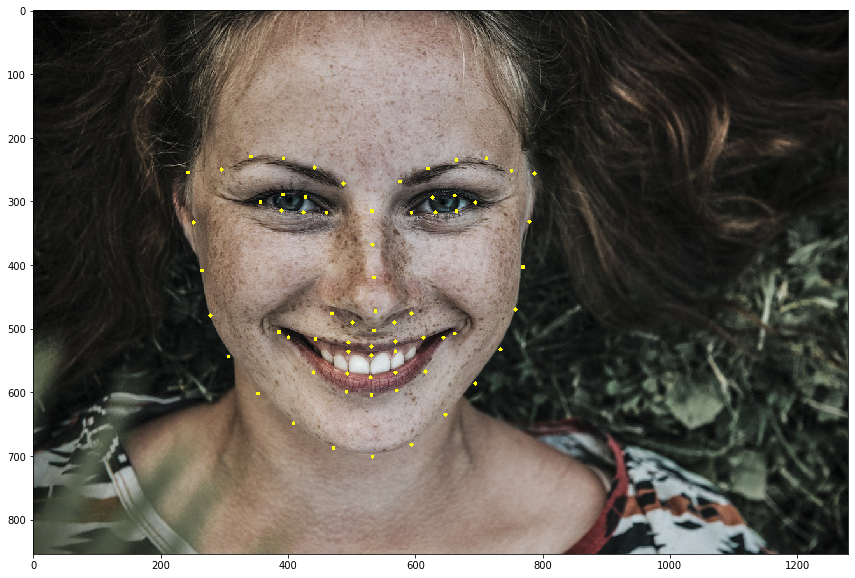

In [51]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [52]:
imagem_pessoa = cv2.imread("imagens/px-man-happy.jpg")
imagem_pessoa = cv2.cvtColor(imagem_pessoa, cv2.COLOR_BGR2RGB)

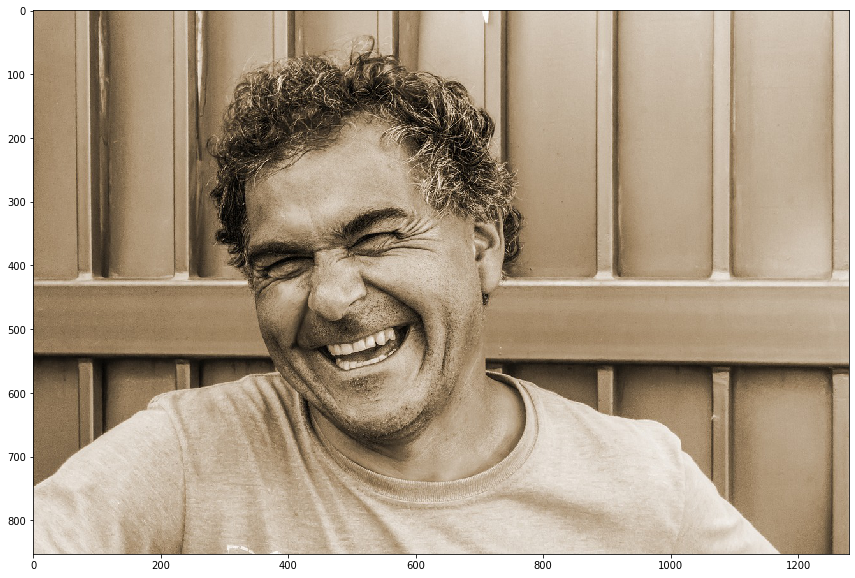

In [53]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa)

In [54]:
imagem_anotada = imagem_pessoa.copy()
marcos_faciais = pontos_marcos_faciais(imagem_anotada)
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

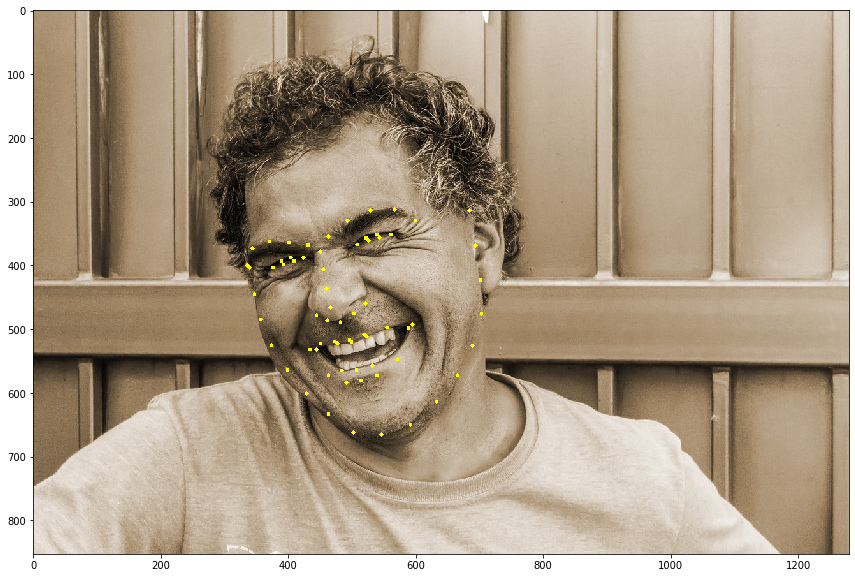

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [56]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIRETA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
NARIZ = list(range(27,35))
MANDIBULA = list(range(0,17))

In [57]:
def aspecto_razao_olhos(pontos_olhos):
    
    a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
    b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
    c = dist.euclidean(pontos_olhos[0], pontos_olhos[3])
    
    aspecto_razao = (a + b)/(2.0 * c)
    
    return aspecto_razao

In [58]:
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco[OLHO_ESQUERDO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
        
        pontos = cv2.convexHull(marco[OLHO_DIREITO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)
    
    return imagem

In [59]:
def anotar_marcos_casca_convexa_boca(imagem, marcos):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return None
    
    for idx, ret in enumerate(retangulos):
        marco = marcos[idx]
        
        pontos = cv2.convexHull(marco[LABIO])
        cv2.drawContours(imagem, [pontos], 0, (0,255,0), 2)

    return imagem

In [60]:
imagem_anotada = imagem_pessoa.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

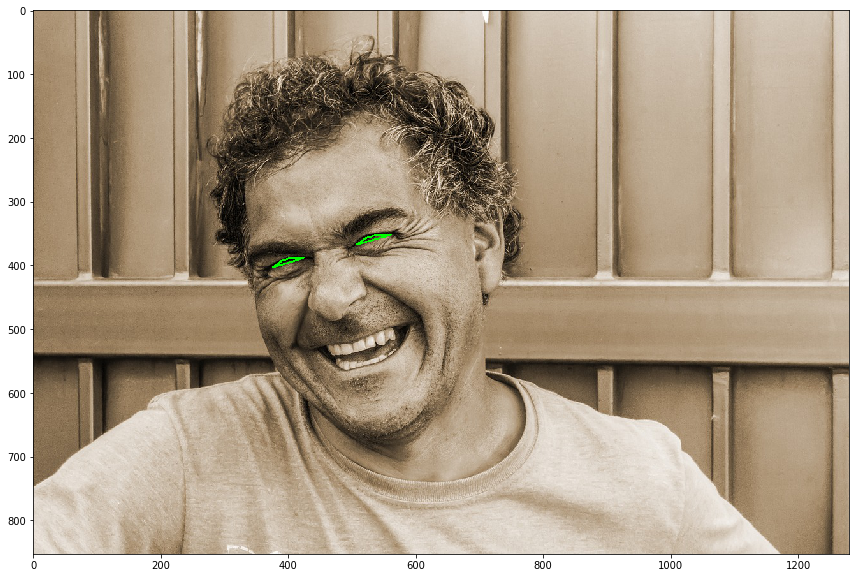

In [61]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [62]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.10269923319261938

In [63]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.13396715136722953

In [64]:
imagem_pessoa_seria = cv2.imread("imagens/px-man-serious.jpg")
imagem_pessoa_seria = cv2.cvtColor(imagem_pessoa_seria, cv2.COLOR_BGR2RGB)

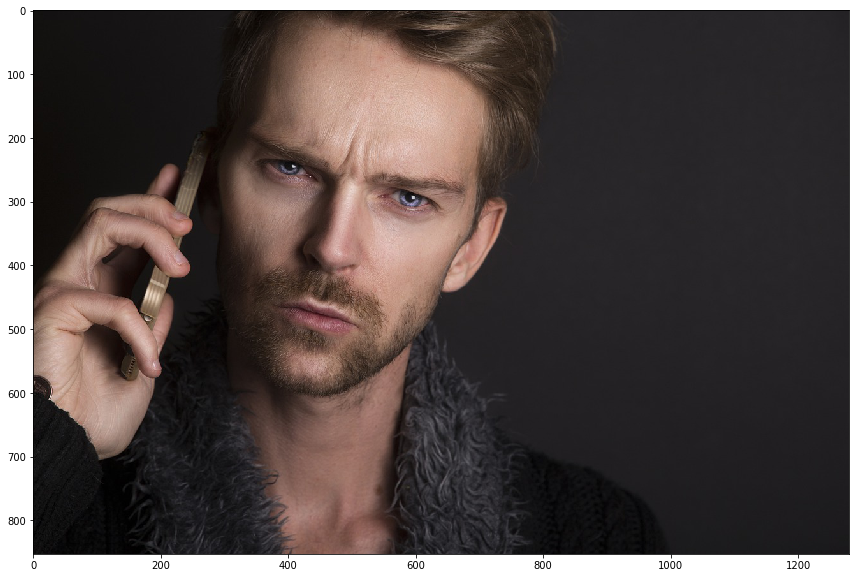

In [65]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_pessoa_seria)

In [66]:
marcos_faciais = pontos_marcos_faciais(imagem_pessoa_seria)

In [67]:
imagem_anotada = imagem_pessoa_seria.copy()
imagem_anotada = anotar_marcos_casca_convexa(imagem_anotada, marcos_faciais)

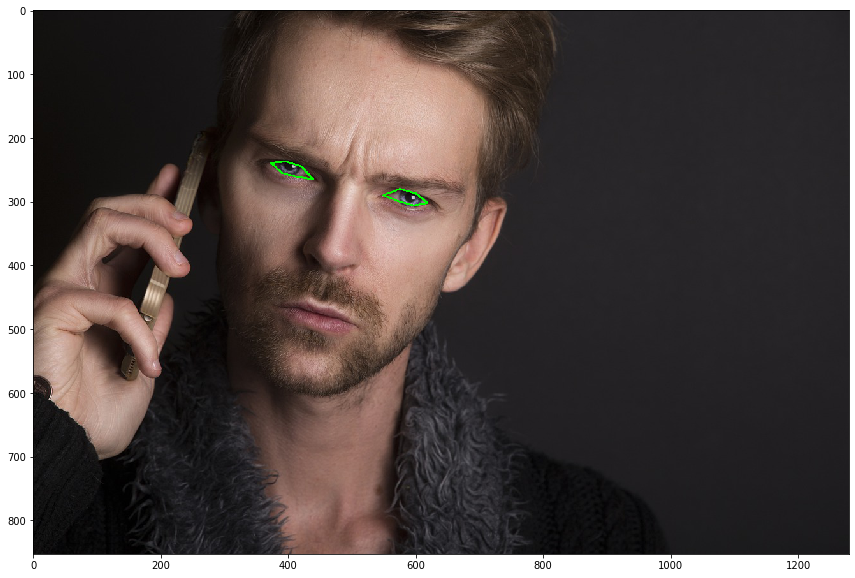

In [68]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)

In [69]:
valor_olho_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olho_esquerdo

0.2746511084931829

In [70]:
valor_olho_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
valor_olho_direito

0.2622183488068983

In [71]:
def padronizar_imagem(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (500, 400))
    return frame

In [72]:
def exibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [74]:
video = cv2.VideoCapture("videos/expressoes.mov")

try:
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
            frame = padronizar_imagem(frame)
            exibir_video(frame)
except KeyboardInterrupt:
    video.release()
    print("Interrompido")

Interrompido


In [75]:
def aspecto_razao_boca(pontos_boca):
    a = dist.euclidean(pontos_boca[3], pontos_boca[9])
    b = dist.euclidean(pontos_boca[2], pontos_boca[10])
    c = dist.euclidean(pontos_boca[4], pontos_boca[8])
    d = dist.euclidean(pontos_boca[0], pontos_boca[6])
    
    aspecto_razao = (a + b + c)/(3.0*d)
    
    return aspecto_razao

In [76]:
try:
    ar_max = 0
    video = cv2.VideoCapture("videos/bocejo.mov")
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
            frame = padronizar_imagem(frame)
            marcos_faciais = pontos_marcos_faciais(frame)
            
            if marcos_faciais is not None:
                ar_boca = aspecto_razao_boca(marcos_faciais[0][LABIO])
                ar_boca = round(ar_boca, 3)
                
                if ar_boca > ar_max:
                    ar_max = ar_boca
                
                info = "boca " + str(ar_boca) + " maximo " + str(ar_max)
                
                frame = anotar_marcos_casca_convexa_boca(frame, marcos_faciais)
                cv2.putText(frame, info, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
            exibir_video(frame)
            
except KeyboardInterrupt:
    video.release()
    print("Interrompido")

Interrompido


In [78]:
try:
    min_olho_esq = 1
    min_olho_dir = 1
    
    video = cv2.VideoCapture("videos/olhos-fechados.mov")
    
    while(True):
        captura_ok, frame = video.read()
        frame = padronizar_imagem(frame)
        
        marcos_faciais = pontos_marcos_faciais(frame)
        
        if marcos_faciais is not None:
            ar_olho_esq = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
            ar_olho_dir = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])
            
            ar_olho_esq = round(ar_olho_esq, 3)
            ar_olho_dir = round(ar_olho_dir, 3)
            
            if ar_olho_esq < min_olho_esq:
                min_olho_esq = ar_olho_esq
                
            if ar_olho_dir < min_olho_dir:
                min_olho_dir = ar_olho_dir
            
            info_oe = "olho esquerdo " + str(ar_olho_esq) + " minimo " + str(min_olho_esq)
            info_od = "olho direito " + str(ar_olho_dir) + " minimo " + str(min_olho_dir)
            
            frame = anotar_marcos_casca_convexa(frame, marcos_faciais)
            
            cv2.putText(frame, info_oe, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            cv2.putText(frame, info_od, (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
        exibir_video(frame)
        
except KeyboardInterrupt:
    video.release()
    print("Interrompido")

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'
